In [16]:
%pylab inline
import numpy as np
from skimage.transform import AffineTransform, warp, rotate

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train = mnist_train[:,1:]
y_train = mnist_train[:,0]
m_train =  X_train.shape[0]
n = X_train.shape[1]
X_test = mnist_test
m_test = X_test.shape[0]

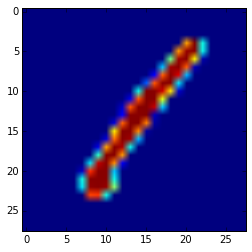

In [4]:
image = X_train[0,:].reshape(28, 28)
plt.imshow(image)

In [11]:
# additional data params
num_rounds = 10
trans_pixels = 1
rot_rad = np.radians(5.0)
X_train.shape

(42000L, 784L)

In [12]:
Xf_train = np.empty((m_train*(num_rounds + 1), n))
Xf_train[0:m_train,:] = X_train

# get density and center of train set
#d_train = np.empty(m_train, float64)
#c_train = np.empty((m_train, 2), float64)
for j in range(num_rounds):
    for i in range(m_train):
        # calculate density
        #nz = np.nonzero(X_train[i,:])
        #lnz = len(nz[0])
        #d_train[i] = lnz*255.0/float(n)

        #reshape image
        image = X_train[i,:].reshape(28, 28)
        nzi = np.nonzero(image)

        # get weighted center
        #c_train[i,:] = np.sum(nzi*image[nzi], axis=1)/float(sum(image[nzi]))

        # rotate
        out = rotate(image, np.degrees(np.random.randn()*rot_rad), preserve_range=True)

        # translate
        #tform = AffineTransform(translation=(c_train[i,0] - 14.0, c_train[i,1] - 14.0))
        tform = AffineTransform(translation=np.random.randn(1,2)*trans_pixels)
        out = warp(out, tform, preserve_range=True)

        # update
        Xf_train[(i + m_train*(j + 1)),:] = out.astype(int).reshape(784)

In [13]:
Xf_train.shape

(462000L, 784L)

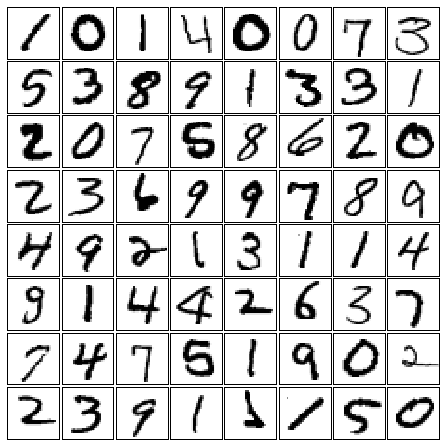

In [14]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(Xf_train[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')

In [15]:
with open("train_f.csv", 'w') as f:
    f.write('label')
    for i in range(784):
        f.write(',pixel%d' % i)
    #f.write(',d')
    f.write('\n')
    for i in range(len(Xf_train)):
        f.write('%d' % y_train[np.mod(i, m_train)])
        for j in range(784):
            f.write(',%d' % Xf_train[i,j])
        #f.write(',%2.3f' % (d_train[i]))
        f.write('\n')

In [144]:
with open("test_f.csv", 'w') as f:
    for i in range(784):
        f.write('pixel%d,' % i)
    f.write('d')
    f.write('\n')
    for i in range(len(X_test)):
        for j in range(784):
            f.write('%d,' % X_test[i,j])
        f.write('%2.3f' % (d_test[i]))
        f.write('\n')